In [208]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import check_random_state
from sklearn import tree

# Visualizar árboles
from IPython.display import Image
import pydotplus
from six import StringIO

# UMAP para la reducción de dimensionalidad
import umap

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

In [209]:
hipotecas = pd.read_csv("hipotecas.csv")
hipotecas.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [210]:
print(hipotecas.groupby('hipoteca').size())

hipoteca
0    135
1     67
dtype: int64


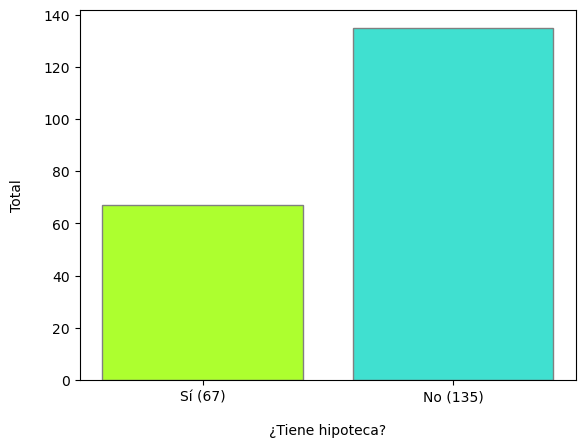

In [211]:
# hacemos un diagrama de barras 
labels = [hipotecas["hipoteca"].value_counts()[1], 
          hipotecas["hipoteca"].value_counts()[0]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, color=("greenyellow","turquoise"), edgecolor="grey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('Sí ('+str(hipotecas["hipoteca"].value_counts()[1])+')',
                   'No ('+str(hipotecas["hipoteca"].value_counts()[0])+')'))
plt.xlabel("¿Tiene hipoteca?", labelpad=14)
plt.ylabel("Total", labelpad=14,)
plt.show()

In [212]:
hipotecas.iloc[:,[0,1,2,3,4,5,7]].describe().T

,count,mean,std,min,25%,50%,75%,max
ingresos,202.0,4958.995050,1682.862556,2008.0,3513.75,4947.5,6374.50,7984.0
gastos_comunes,202.0,971.584158,272.106351,384.0,766.75,968.0,1165.25,1585.0
pago_coche,202.0,211.742574,124.940754,0.0,99.00,208.5,318.75,448.0
gastos_otros,202.0,515.425743,168.103075,201.0,383.25,522.5,656.75,828.0
ahorros,202.0,38749.668317,17365.231870,10319.0,24964.25,38523.0,52150.75,69934.0
vivienda,202.0,373349.638614,136371.525622,176553.0,274810.00,340783.5,444482.00,669540.0
hijos,202.0,1.232673,1.367833,0.0,0.00,1.0,2.00,4.0


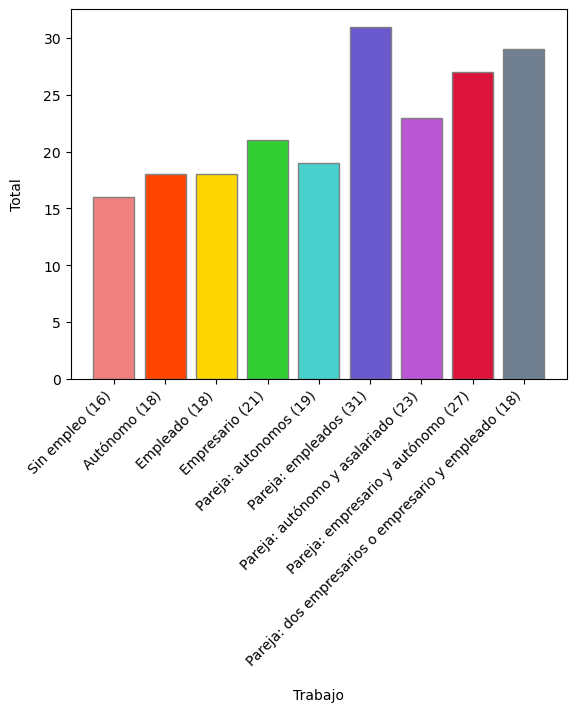

In [213]:
labels = [hipotecas["trabajo"].value_counts()[0], 
          hipotecas["trabajo"].value_counts()[1],
          hipotecas["trabajo"].value_counts()[2],
          hipotecas["trabajo"].value_counts()[3],
          hipotecas["trabajo"].value_counts()[4],
          hipotecas["trabajo"].value_counts()[5],
          hipotecas["trabajo"].value_counts()[6],
          hipotecas["trabajo"].value_counts()[7],
          hipotecas["trabajo"].value_counts()[8]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, 
        color=("lightcoral","orangered","gold","limegreen",
               "mediumturquoise","slateblue","mediumorchid","crimson","slategrey"), 
        edgecolor="grey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('Sin empleo ('+str(hipotecas["trabajo"].value_counts()[0])+')',
                   'Autónomo ('+str(hipotecas["trabajo"].value_counts()[1])+')',
                   'Empleado ('+str(hipotecas["trabajo"].value_counts()[2])+')',
                   'Empresario ('+str(hipotecas["trabajo"].value_counts()[3])+')',
                   'Pareja: autonomos ('+str(hipotecas["trabajo"].value_counts()[4])+')',
                   'Pareja: empleados ('+str(hipotecas["trabajo"].value_counts()[5])+')',
                   'Pareja: autónomo y asalariado ('+str(hipotecas["trabajo"].value_counts()[6])+')',
                   'Pareja: empresario y autónomo ('+str(hipotecas["trabajo"].value_counts()[7])+')',
                   'Pareja: dos empresarios o empresario y empleado ('+str(hipotecas["trabajo"].value_counts()[2])+')'),
           rotation=45, ha='right')
plt.xlabel("Trabajo", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.show()

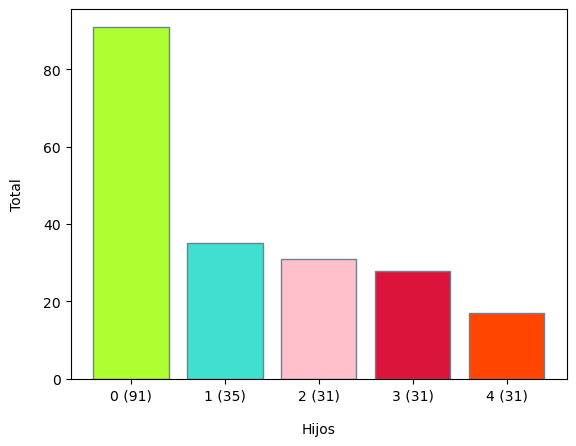

In [214]:
labels = [hipotecas["hijos"].value_counts()[0], 
          hipotecas["hijos"].value_counts()[1],
          hipotecas["hijos"].value_counts()[2],
          hipotecas["hijos"].value_counts()[3],
          hipotecas["hijos"].value_counts()[4]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, color=("greenyellow","turquoise","pink","crimson","orangered"),edgecolor="slategrey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('0 ('+str(hipotecas["hijos"].value_counts()[0])+')',
                   '1 ('+str(hipotecas["hijos"].value_counts()[1])+')',
                   '2 ('+str(hipotecas["hijos"].value_counts()[2])+')',
                   '3 ('+str(hipotecas["hijos"].value_counts()[2])+')',
                   '4 ('+str(hipotecas["hijos"].value_counts()[2])+')'))
plt.xlabel("Hijos", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.show()

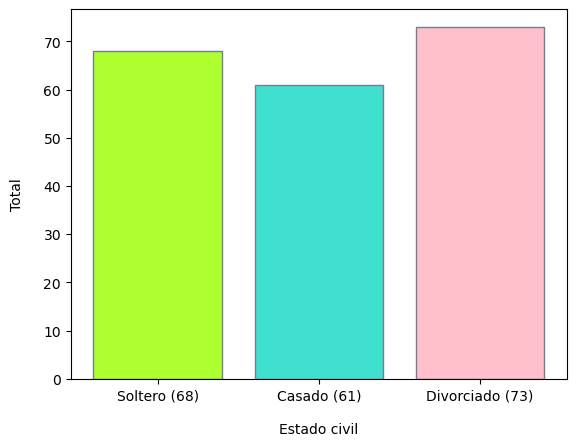

In [215]:
labels = [hipotecas["estado_civil"].value_counts()[0], 
          hipotecas["estado_civil"].value_counts()[1],
          hipotecas["estado_civil"].value_counts()[2]]
values = np.arange(len(labels))
# creamos el plot
plt.bar(values, labels, color=("greenyellow","turquoise","pink"),edgecolor="slategrey")
# diseñamos los nombres para el eje x
plt.xticks(values, ('Soltero ('+str(hipotecas["estado_civil"].value_counts()[0])+')',
                   'Casado ('+str(hipotecas["estado_civil"].value_counts()[1])+')',
                   'Divorciado ('+str(hipotecas["estado_civil"].value_counts()[2])+')'))
plt.xlabel("Estado civil", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.show()

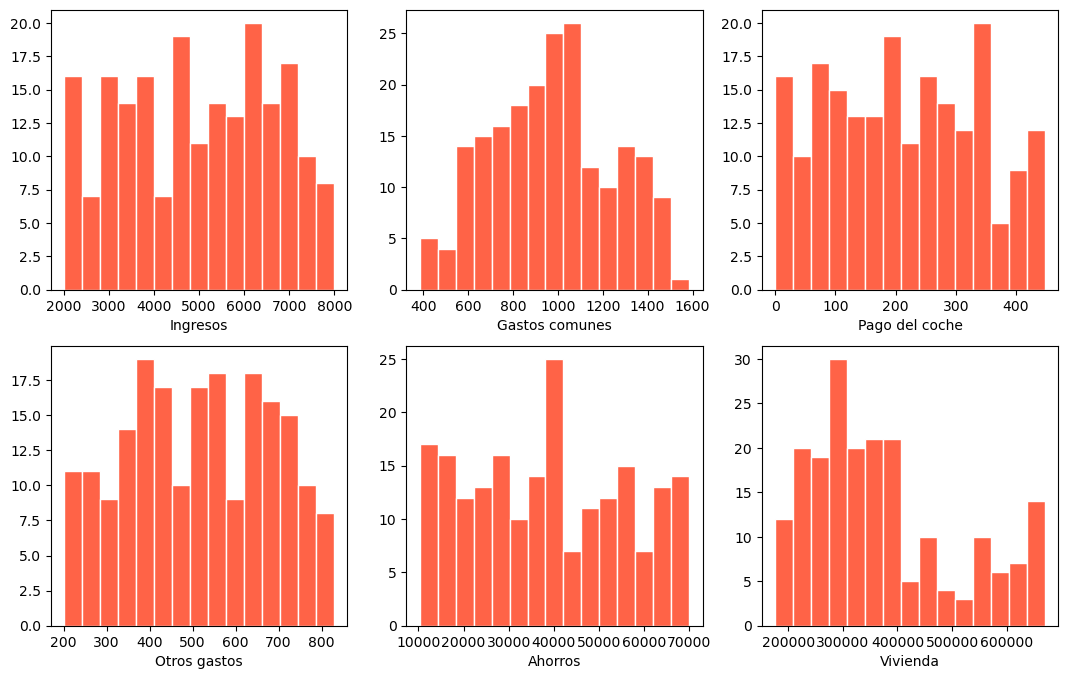

In [216]:
f = plt.figure(figsize=(13, 8))
# ingresos
f.add_subplot(231)
plt.hist(hipotecas['ingresos'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Ingresos")

# gastos comunes
f.add_subplot(232)
plt.hist(hipotecas['gastos_comunes'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Gastos comunes")

# pagos del coche
f.add_subplot(233)
plt.hist(hipotecas['pago_coche'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Pago del coche")

# otros gastos
f.add_subplot(234)
plt.hist(hipotecas['gastos_otros'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Otros gastos")

# ahorros
f.add_subplot(235)
plt.hist(hipotecas['ahorros'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Ahorros")

# vivienda
f.add_subplot(236)
plt.hist(hipotecas['vivienda'], color = "tomato", edgecolor='white', bins = 15)
plt.xlabel("Vivienda")

plt.show()

In [217]:
hipotecas.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
hipoteca          0
dtype: int64

In [218]:
hipotecas['gastos'] = (hipotecas['pago_coche'] + hipotecas['gastos_comunes'] + hipotecas['gastos_otros'])
hipotecas.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca,gastos
0,6000,1000,0,600,50000,400000,0,2,2,1,1600
1,6745,944,123,429,43240,636897,1,3,6,0,1496
2,6455,1033,98,795,57463,321779,2,1,8,1,1926
3,7098,1278,15,254,54506,660933,0,0,3,0,1547
4,6167,863,223,520,41512,348932,0,0,3,1,1606


In [219]:
hipotecas['financiar'] = hipotecas['vivienda'] - hipotecas['ahorros']
hipotecas.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
3,7098,1278,15,254,54506,660933,0,0,3,0,1547,606427
4,6167,863,223,520,41512,348932,0,0,3,1,1606,307420


In [220]:
df = hipotecas.drop(['gastos_comunes','gastos_otros','pago_coche','ahorros','vivienda'], axis = 1)
df.head()

,ingresos,estado_civil,hijos,trabajo,hipoteca,gastos,financiar
0,6000,0,2,2,1,1600,350000
1,6745,1,3,6,0,1496,593657
2,6455,2,1,8,1,1926,264316
3,7098,0,0,3,0,1547,606427
4,6167,0,0,3,1,1606,307420


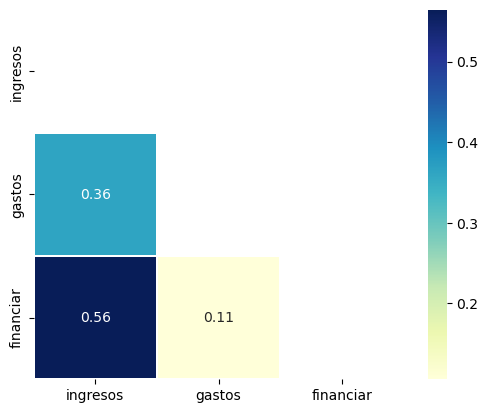

In [221]:
# creamos un nuevo data frame donde solo tengamos las variables que estamos analizando
df_analysis = df[["ingresos","gastos","financiar"]]
# creamos la matriz de correlación:
corr = df_analysis.corr().round(4)
# creamos una más cara para mostrar solo la mitad de la gráfica de correlación
mask = np.triu(np.ones_like(corr, dtype=bool))
# mostramos gráicamente la matriz
sns.heatmap(corr, mask=mask, annot = True, cmap = 'YlGnBu', linewidths = 0.2, square = True)
plt.show()

C:\Users\iredi\AppData\Local\Temp\ipykernel_14840\2639121793.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Soltero","Casado","Divorciado"])


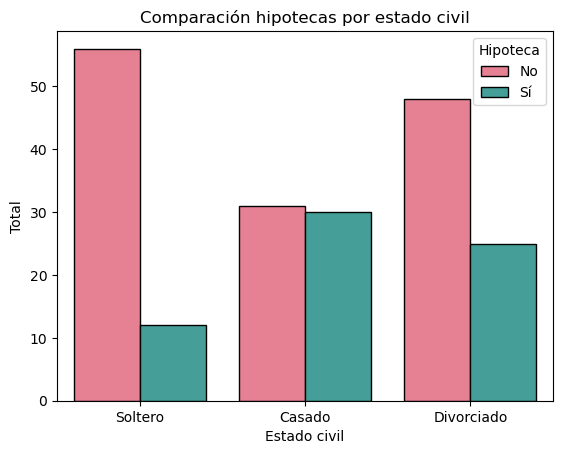

In [222]:
x = df.groupby(['hipoteca','estado_civil']).size().to_frame('occurences').reset_index()
sns.set_palette("Set2", 1)
ax = sns.barplot(x='estado_civil', y='occurences', hue='hipoteca', edgecolor = "black", data=x)
ax.set(xlabel='Estado civil', ylabel='Total', title='Comparación hipotecas por estado civil')
ax.set_xticklabels(["Soltero","Casado","Divorciado"])
h, l = ax.get_legend_handles_labels()
labels=["No","Sí"]
ax.legend(h, labels, title="Hipoteca")
plt.show()

C:\Users\iredi\AppData\Local\Temp\ipykernel_14840\1725370804.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Sin empleo","Autónomo","Empleado","Empresario","Pareja: autónomos",


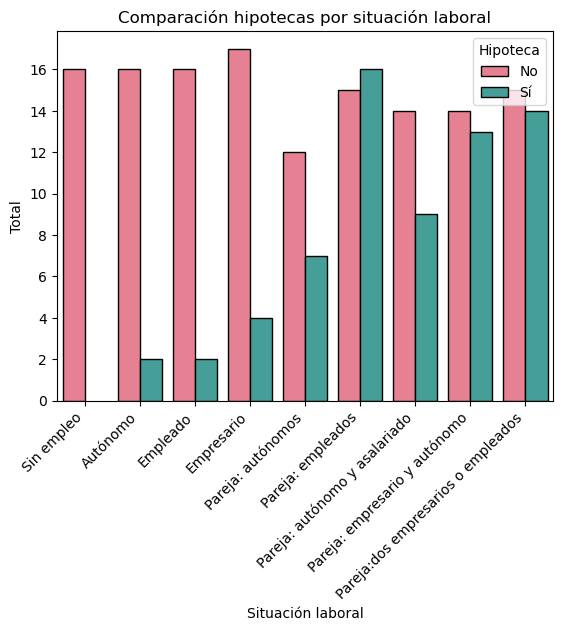

In [223]:
x = df.groupby(['hipoteca','trabajo']).size().to_frame('occurences').reset_index()
sns.set_palette("Set2", 1)
ax=sns.barplot(x='trabajo', y='occurences', hue='hipoteca', edgecolor = "black", data=x)
ax.set(xlabel='Situación laboral', ylabel='Total', title='Comparación hipotecas por situación laboral')
ax.set_xticklabels(["Sin empleo","Autónomo","Empleado","Empresario","Pareja: autónomos",
                    "Pareja: empleados","Pareja: autónomo y asalariado","Pareja: empresario y autónomo",
                    "Pareja:dos empresarios o empleados"],
                   rotation=45, ha='right')
h, l = ax.get_legend_handles_labels()
labels=["No","Sí"]
ax.legend(h, labels, title="Hipoteca")
plt.show()

C:\Users\iredi\AppData\Local\Temp\ipykernel_14840\2077759094.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["0","1","2","3","4"])


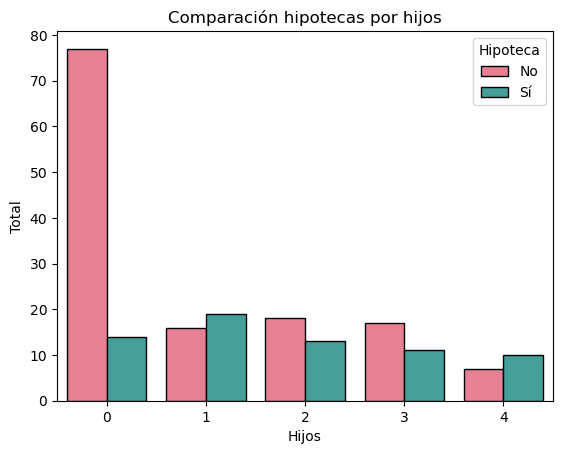

In [224]:
x = df.groupby(['hipoteca','hijos']).size().to_frame('occurences').reset_index()
sns.set_palette("Set2", 1)
ax=sns.barplot(x='hijos', y='occurences', hue='hipoteca', edgecolor = "black", data=x)
ax.set(xlabel='Hijos', ylabel='Total', title='Comparación hipotecas por hijos')
ax.set_xticklabels(["0","1","2","3","4"])
h, l = ax.get_legend_handles_labels()
labels=["No","Sí"]
ax.legend(h, labels, title="Hipoteca")
plt.show()

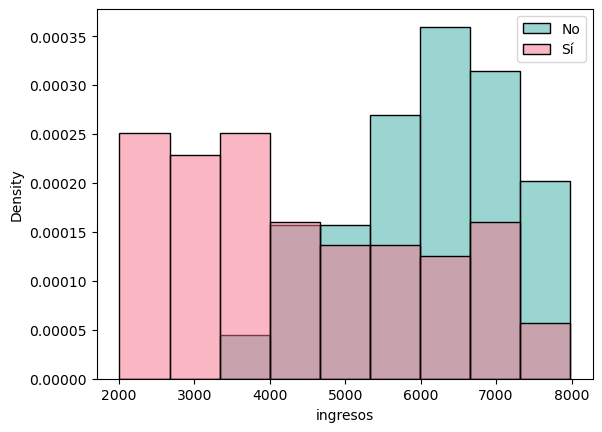

In [225]:
x = df.groupby(['hipoteca','ingresos']).size().to_frame('occurences').reset_index()
fig = sns.histplot(
    x, x="ingresos", hue="hipoteca", 
    stat="density", common_norm=False, alpha=0.5
)
fig.legend(labels=['No','Sí'])
plt.show()

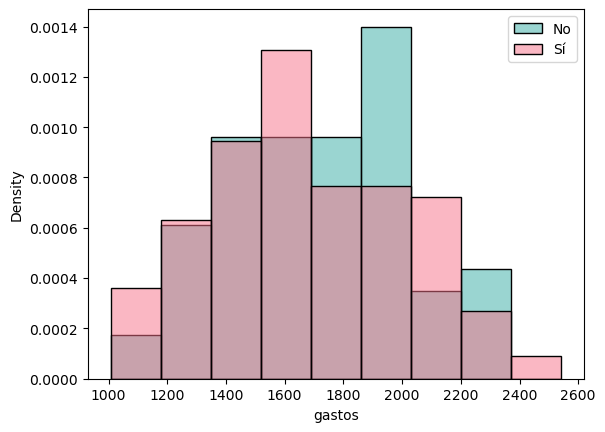

In [226]:
x = df.groupby(['hipoteca','gastos']).size().to_frame('occurences').reset_index()
fig = sns.histplot(
    x, x="gastos", hue="hipoteca", 
    stat="density", common_norm=False, alpha=0.5
)
fig.legend(labels=['No','Sí'])
plt.show()

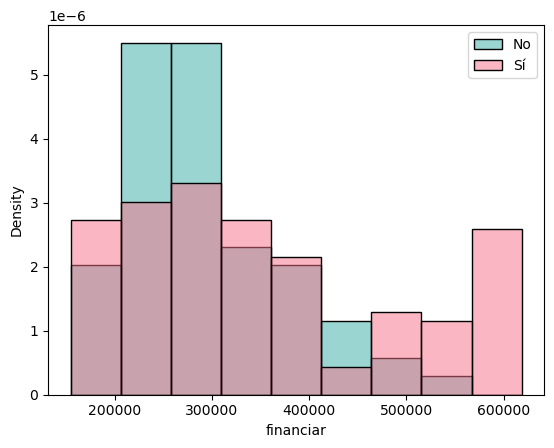

In [227]:
x = df.groupby(['hipoteca','financiar']).size().to_frame('occurences').reset_index()
fig = sns.histplot(
    x, x="financiar", hue="hipoteca", 
    stat="density", common_norm=False, alpha=0.5
)
fig.legend(labels=['No','Sí'])
plt.show()

In [228]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['estado_civil']]).toarray())
df = df.join(enc_df)
df.rename(columns={0: "soltero", 1: "casado", 2: "divorciado"}, inplace=True)
df.drop(columns=['estado_civil'], inplace=True)  # Optional: Drop original column
df.head()


,ingresos,hijos,trabajo,hipoteca,gastos,financiar,soltero,casado,divorciado
0,6000,2,2,1,1600,350000,1.0,0.0,0.0
1,6745,3,6,0,1496,593657,0.0,1.0,0.0
2,6455,1,8,1,1926,264316,0.0,0.0,1.0
3,7098,0,3,0,1547,606427,1.0,0.0,0.0
4,6167,0,3,1,1606,307420,1.0,0.0,0.0


In [229]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['trabajo']]).toarray())
df = df.join(enc_df)
df.rename(columns={0: "sin empleo", 1: "autónomo", 2: "empleado", 3: "empresario",
                  4: "pareja: autónomos", 5: "pareja: empleados", 6: "pareja: autónomo y asalariado",
                  7: "pareja: empresario y autónomo", 8: "pareja: dos empresarios / empresario y empleado"}, inplace=True)
df.drop(columns=['trabajo'], inplace=True)
df.head()

,ingresos,hijos,hipoteca,gastos,financiar,soltero,casado,divorciado,sin empleo,autónomo,empleado,empresario,pareja: autónomos,pareja: empleados,pareja: autónomo y asalariado,pareja: empresario y autónomo,pareja: dos empresarios / empresario y empleado
0,6000,2,1,1600,350000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6745,3,0,1496,593657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6455,1,1,1926,264316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7098,0,0,1547,606427,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6167,0,1,1606,307420,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [230]:
df=df[["ingresos","gastos","financiar","hijos","soltero","casado","divorciado","sin empleo","autónomo","empleado",
     "pareja: autónomos","pareja: empleados","pareja: autónomo y asalariado","pareja: empresario y autónomo",
      "pareja: dos empresarios / empresario y empleado","hipoteca"]]
df.head(1)

,ingresos,gastos,financiar,hijos,soltero,casado,divorciado,sin empleo,autónomo,empleado,pareja: autónomos,pareja: empleados,pareja: autónomo y asalariado,pareja: empresario y autónomo,pareja: dos empresarios / empresario y empleado,hipoteca
0,6000,1600,350000,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [231]:
x = df.iloc[:,:15]
y = df['hipoteca']
y = y.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [232]:
clt = DecisionTreeClassifier(max_depth = 5)
clt.fit(X_train, y_train)
y_pred = clt.predict(X_test)

text_representation = tree.export_text(clt)
print(text_representation)

|--- feature_0 <= 4506.00
|   |--- feature_13 <= 0.50
|   |   |--- class: 0
|   |--- feature_13 >  0.50
|   |   |--- feature_0 <= 3159.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  3159.50
|   |   |   |--- feature_2 <= 239693.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  239693.50
|   |   |   |   |--- class: 0
|--- feature_0 >  4506.00
|   |--- feature_2 <= 457149.00
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_0 <= 4947.50
|   |   |   |   |--- feature_2 <= 237411.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  237411.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  4947.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: 0
|   |--- feature_2 >  457149.00
|   |   |--- feature_3 <= 3.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_0 <= 734

In [233]:
z = X_train.columns
y=clt.feature_importances_
print(pd.DataFrame(y, z))

                                                        0
ingresos                                         0.368947
gastos                                           0.000000
financiar                                        0.408521
hijos                                            0.025719
soltero                                          0.000000
casado                                           0.000000
divorciado                                       0.000000
sin empleo                                       0.124984
autónomo                                         0.000000
empleado                                         0.000000
pareja: autónomos                                0.024141
pareja: empleados                                0.000000
pareja: autónomo y asalariado                    0.000000
pareja: empresario y autónomo                    0.020310
pareja: dos empresarios / empresario y empleado  0.027378


In [234]:
# evaluamos modelo
print('Accuracy del Tree Classifier en training set: {:.2f}'.format(clt.score(X_train, y_train)))
print('Accuracy del Tree Classifier en test set: {:.2f}'.format(clt.score(X_test, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy del Tree Classifier en training set: 0.98
Accuracy del Tree Classifier en test set: 0.80
Confusion matrix:
[[22  6]
 [ 2 11]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.65      0.85      0.73        13

    accuracy                           0.80        41
   macro avg       0.78      0.82      0.79        41
weighted avg       0.83      0.80      0.81        41



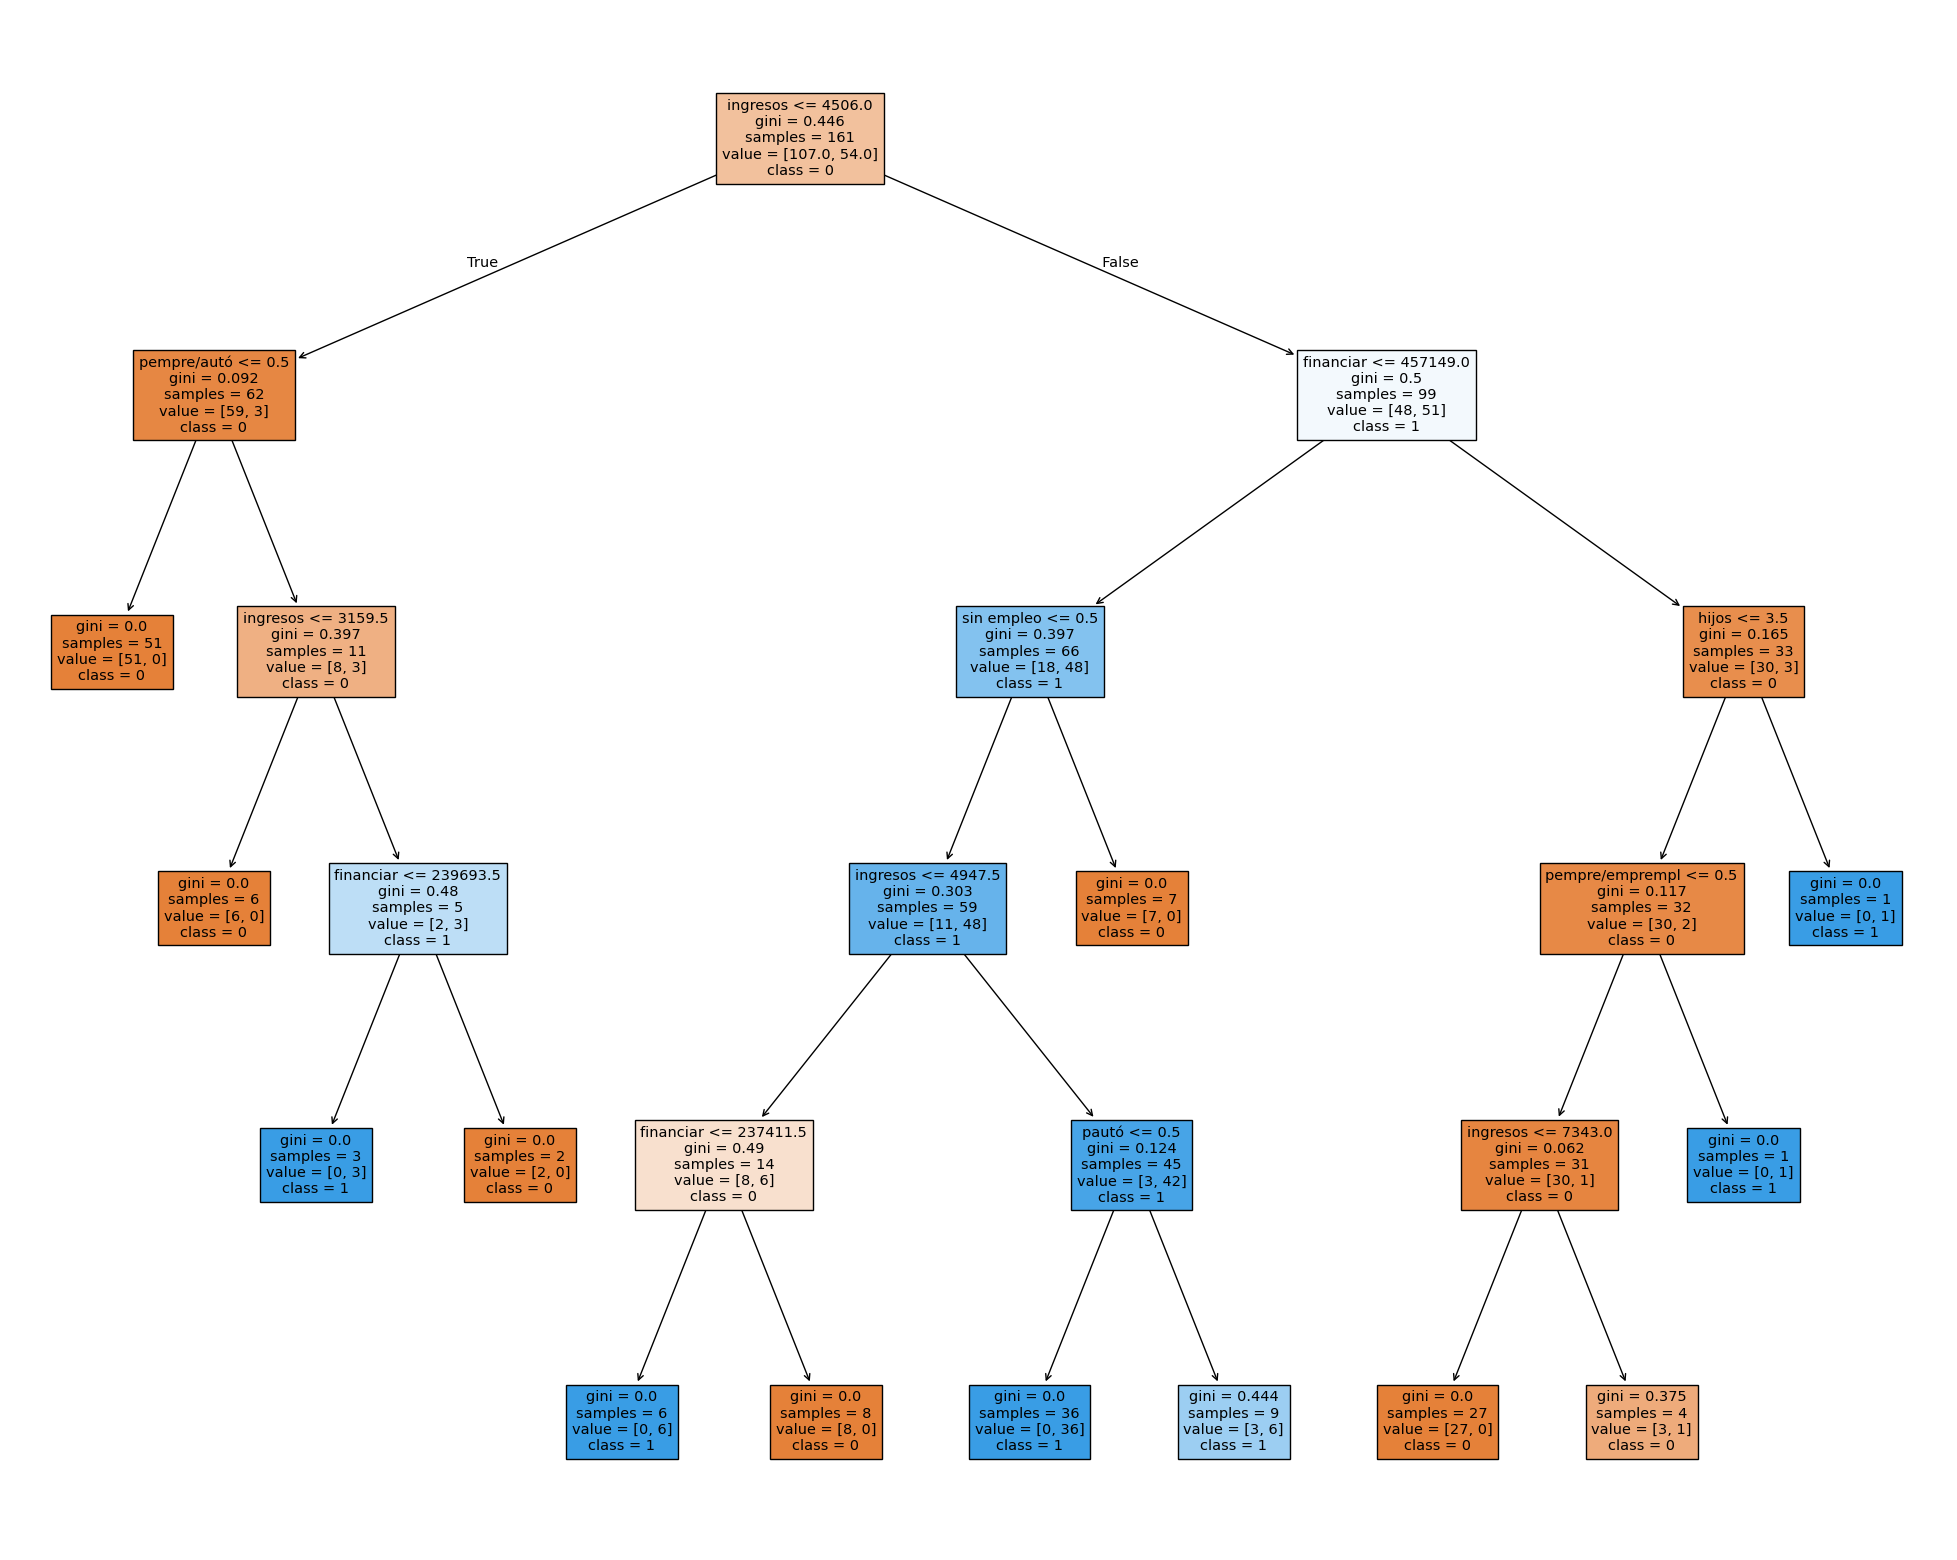

In [235]:
fn=["ingresos","gastos","financiar","hijos","soltero","casado","divorciado","sin empleo","autónomo","empleado",
     "pautó","pempl","pautó/asala","pempre/autó",
      "pempre/emprempl"]
cn=["0","1"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clt, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)
plt.show()

In [236]:
tuned_parameters = [{'max_depth': [8,9,10,11,12],
                     'n_estimators': [50,100,200]}]

gs = GridSearchCV(
    RandomForestClassifier(),
    tuned_parameters,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [237]:
print("El mejor párametro es:",gs_results.best_params_)

El mejor párametro es: {'max_depth': 12, 'n_estimators': 200}


In [238]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 12)
rf.fit(X_train, y_train);

In [239]:
y_pred = rf.predict(X_test)

In [240]:
# evaluamos modelo
print('Accuracy del Tree Classifier en training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy del Tree Classifier en test set: {:.2f}'.format(rf.score(X_test, y_test)))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
      
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy del Tree Classifier en training set: 1.00
Accuracy del Tree Classifier en test set: 0.88
Confusion matrix:
[[27  1]
 [ 4  9]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.90      0.69      0.78        13

    accuracy                           0.88        41
   macro avg       0.89      0.83      0.85        41
weighted avg       0.88      0.88      0.87        41



In [241]:
z = X_train.columns
y=rf.feature_importances_
print(pd.DataFrame(y, z))

                                                        0
ingresos                                         0.345111
gastos                                           0.129449
financiar                                        0.227227
hijos                                            0.117678
soltero                                          0.027228
casado                                           0.015432
divorciado                                       0.020080
sin empleo                                       0.021169
autónomo                                         0.007640
empleado                                         0.007522
pareja: autónomos                                0.012065
pareja: empleados                                0.022627
pareja: autónomo y asalariado                    0.012537
pareja: empresario y autónomo                    0.017337
pareja: dos empresarios / empresario y empleado  0.016899


In [242]:
casos = {'ingresos': [2000,6000,9000], 'gastos': [500,3400,2250], 'financiar': [200000,320000,39000],
        'hijos': [0,2,1], 'soltero': [0,0,1], 'casado': [1,1,0], 'divorciado': [0,0,0], 'sin empleo': [0,0,0],
        'autónomo': [0,0,1], 'empleado': [0,0,0], 'pareja: autónomos': [0,0,0], 'pareja: empleados': [0,0,0],
        'pareja: autónomo y asalariado': [0,1,0], 'pareja: empresario y autónomo': [0,0,0], 
        'pareja: dos empresarios / empresario y empleado': [1,0,0]}

casos = pd.DataFrame(casos)
casos

,ingresos,gastos,financiar,hijos,soltero,casado,divorciado,sin empleo,autónomo,empleado,pareja: autónomos,pareja: empleados,pareja: autónomo y asalariado,pareja: empresario y autónomo,pareja: dos empresarios / empresario y empleado
0,2000,500,200000,0,0,1,0,0,0,0,0,0,0,0,1
1,6000,3400,320000,2,0,1,0,0,0,0,0,0,1,0,0
2,9000,2250,39000,1,1,0,0,0,1,0,0,0,0,0,0


In [243]:
y_pred = rf.predict(casos)
y_pred

array([0, 1, 1], dtype=int64)